# Titanic
https://www.kaggle.com/c/titanic

加入numpy, pandas, matplot等库

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # 画图常用库

读入数据

In [4]:
dataset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')


In [5]:
dataset.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

0, PassengerId：乘客的数字id

1, Survived：幸存(1)、死亡(0)

2, Pclass：乘客船层—1st = Upper，2nd = Middle， 3rd = Lower

3, Name：名字。

4, Sex：性别

5, Age：年龄

6, SibSp：兄弟姐妹和配偶的数量。

7, Parch：父母和孩子的数量。

8, Ticket：船票号码。

9, Fare：船票价钱。

10, Cabin：船舱。

11, Embarked：从哪个地方登上泰坦尼克号。 C = Cherbourg, Q = Queenstown, S = Southampton

# 查看读入数据

In [6]:
dataset.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [7]:
print(dataset.dtypes)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [8]:
print(dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [9]:
print(dataset.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


从上面数据发现两个有意思的事情

1. 数据有NULL元素
2. 数据

# 仔细观察数据

观察年龄

0      male
1    female
2    female
3    female
4      male
5      male
6      male
7      male
8    female
9    female
Name: Sex, dtype: object


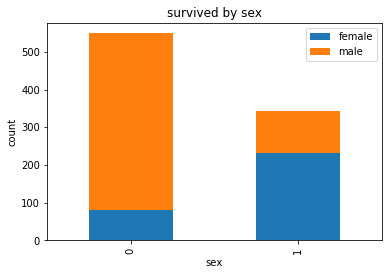

In [10]:
print (dataset['Sex'][0:10])
Survived_m = dataset.Survived[dataset.Sex == 'male'].value_counts()
Survived_f = dataset.Survived[dataset.Sex == 'female'].value_counts()

df=pd.DataFrame({'male':Survived_m, 'female':Survived_f})
df.plot(kind='bar', stacked=True)
plt.title("survived by sex")
plt.xlabel("sex") 
plt.ylabel("count")
plt.show()


看看年龄

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64


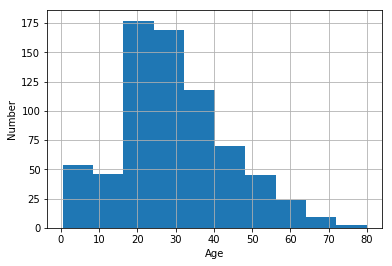

True


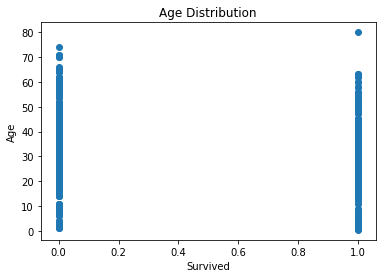

In [11]:
print (dataset['Age'][0:10])
dataset['Age'].hist()  
plt.ylabel("Number") 
plt.xlabel("Age") 
plt.show()  

print(dataset['Age'].isnull().values.any())
plt.scatter(dataset['Survived'], dataset['Age'])
plt.ylabel("Age") 
plt.xlabel("Survived") 
plt.title("Age Distribution")
plt.show()


看看船票价钱

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
5     8.4583
6    51.8625
7    21.0750
8    11.1333
9    30.0708
Name: Fare, dtype: float64


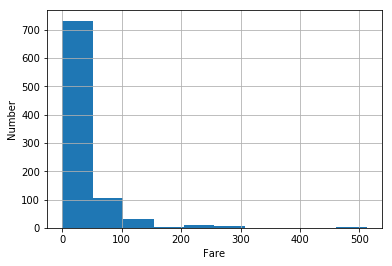

False


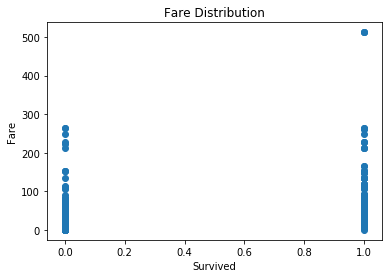

In [12]:
print (dataset['Fare'][0:10])
dataset['Fare'].hist()  
plt.ylabel("Number") 
plt.xlabel("Fare") 
plt.show()  

print(dataset['Fare'].isnull().values.any())
plt.scatter(dataset['Survived'], dataset['Fare'])
plt.ylabel("Fare") 
plt.xlabel("Survived") 
plt.title("Fare Distribution")
plt.show()


观察乘客舱层

0    3
1    1
2    3
3    1
4    3
5    3
6    1
7    3
8    3
9    2
Name: Pclass, dtype: int64


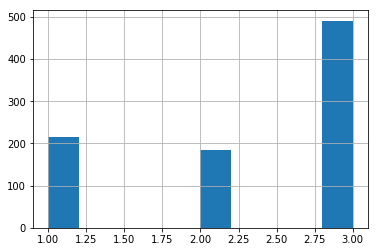

False
    p1  p2   p3
0   80  97  372
1  136  87  119


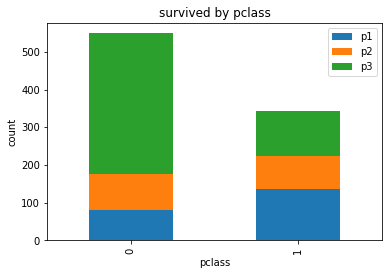

In [13]:
print (dataset['Pclass'][0:10])
dataset['Pclass'].hist()  
plt.show()  
print(dataset['Pclass'].isnull().values.any())

Survived_p1 = dataset.Survived[dataset['Pclass'] == 1].value_counts()
Survived_p2 = dataset.Survived[dataset['Pclass'] == 2].value_counts()
Survived_p3 = dataset.Survived[dataset['Pclass'] == 3].value_counts()

df=pd.DataFrame({'p1':Survived_p1, 'p2':Survived_p2, 'p3':Survived_p3})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("survived by pclass")
plt.xlabel("pclass") 
plt.ylabel("count")
plt.show()


0    S
1    C
2    S
3    S
4    S
5    Q
6    S
7    S
8    S
9    C
Name: Embarked, dtype: object
0    427
1    217
Name: Survived, dtype: int64


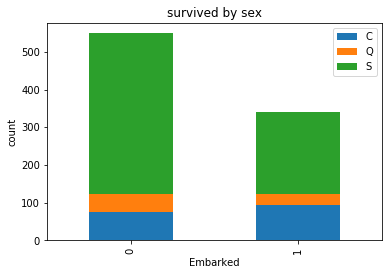

In [14]:
print (dataset['Embarked'][0:10])
Survived_S = dataset.Survived[dataset['Embarked'] == 'S'].value_counts()
Survived_C = dataset.Survived[dataset['Embarked'] == 'C'].value_counts()
Survived_Q = dataset.Survived[dataset['Embarked'] == 'Q'].value_counts()

print(Survived_S)
df = pd.DataFrame({'S':Survived_S, 'C':Survived_C, 'Q':Survived_Q})
df.plot(kind='bar', stacked=True)
plt.title("survived by sex")
plt.xlabel("Embarked") 
plt.ylabel("count")
plt.show()


# 保留下有效数据
pclass, sex, age, fare, embarked

# 分离label 和 训练数据

In [15]:
label=dataset.loc[:,'Survived']
data=dataset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]
testdat=testset.loc[:,['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']]

print(data.shape)
print(data)

(891, 5)
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male   NaN    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male   NaN   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female   NaN    7.2250        C
20        2    male  35.0   26.0000        S
2

处理空数据

In [16]:
def fill_NAN(data):  
    data_copy = data.copy(deep=True)
    data_copy.loc[:,'Age'] = data_copy['Age'].fillna(data_copy['Age'].median())
    data_copy.loc[:,'Fare'] = data_copy['Fare'].fillna(data_copy['Fare'].median())
    data_copy.loc[:,'Pclass'] = data_copy['Pclass'].fillna(data_copy['Pclass'].median())
    data_copy.loc[:,'Sex'] = data_copy['Sex'].fillna('female')
    data_copy.loc[:,'Embarked'] = data_copy['Embarked'].fillna('S')
    return data_copy


data_no_nan = fill_NAN(data)
testdat_no_nan = fill_NAN(testdat)

print(testdat.isnull().values.any())    
print(testdat_no_nan.isnull().values.any())
print(data.isnull().values.any())    

print(data_no_nan)

# print(data)

True
False
True
     Pclass     Sex   Age      Fare Embarked
0         3    male  22.0    7.2500        S
1         1  female  38.0   71.2833        C
2         3  female  26.0    7.9250        S
3         1  female  35.0   53.1000        S
4         3    male  35.0    8.0500        S
5         3    male  28.0    8.4583        Q
6         1    male  54.0   51.8625        S
7         3    male   2.0   21.0750        S
8         3  female  27.0   11.1333        S
9         2  female  14.0   30.0708        C
10        3  female   4.0   16.7000        S
11        1  female  58.0   26.5500        S
12        3    male  20.0    8.0500        S
13        3    male  39.0   31.2750        S
14        3  female  14.0    7.8542        S
15        2  female  55.0   16.0000        S
16        3    male   2.0   29.1250        Q
17        2    male  28.0   13.0000        S
18        3  female  31.0   18.0000        S
19        3  female  28.0    7.2250        C
20        2    male  35.0   26.0000    

处理Sex 

In [17]:
print(data_no_nan['Sex'].isnull().values.any())

def transfer_sex(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Sex'] == 'female', 'Sex'] = 0
    data_copy.loc[data_copy['Sex'] == 'male', 'Sex'] = 1
    return data_copy

data_after_sex = transfer_sex(data_no_nan)
testdat_after_sex = transfer_sex(testdat_no_nan)
print(testdat_after_sex)
    

False
     Pclass  Sex   Age      Fare Embarked
0         3    1  34.5    7.8292        Q
1         3    0  47.0    7.0000        S
2         2    1  62.0    9.6875        Q
3         3    1  27.0    8.6625        S
4         3    0  22.0   12.2875        S
5         3    1  14.0    9.2250        S
6         3    0  30.0    7.6292        Q
7         2    1  26.0   29.0000        S
8         3    0  18.0    7.2292        C
9         3    1  21.0   24.1500        S
10        3    1  27.0    7.8958        S
11        1    1  46.0   26.0000        S
12        1    0  23.0   82.2667        S
13        2    1  63.0   26.0000        S
14        1    0  47.0   61.1750        S
15        2    0  24.0   27.7208        C
16        2    1  35.0   12.3500        Q
17        3    1  21.0    7.2250        C
18        3    0  27.0    7.9250        S
19        3    0  45.0    7.2250        C
20        1    1  55.0   59.4000        C
21        3    1   9.0    3.1708        S
22        1    0  27.0   31.

处理Embarked

In [18]:

def transfer_embark(data):
    data_copy = data.copy(deep=True)
    data_copy.loc[data_copy['Embarked'] == 'S', 'Embarked'] = 0
    data_copy.loc[data_copy['Embarked'] == 'C', 'Embarked'] = 1
    data_copy.loc[data_copy['Embarked'] == 'Q', 'Embarked'] = 2
    return data_copy

data_after_embarked = transfer_embark(data_after_sex)
testdat_after_embarked = transfer_embark(testdat_after_sex)
print(testdat_after_embarked)

     Pclass  Sex   Age      Fare  Embarked
0         3    1  34.5    7.8292         2
1         3    0  47.0    7.0000         0
2         2    1  62.0    9.6875         2
3         3    1  27.0    8.6625         0
4         3    0  22.0   12.2875         0
5         3    1  14.0    9.2250         0
6         3    0  30.0    7.6292         2
7         2    1  26.0   29.0000         0
8         3    0  18.0    7.2292         1
9         3    1  21.0   24.1500         0
10        3    1  27.0    7.8958         0
11        1    1  46.0   26.0000         0
12        1    0  23.0   82.2667         0
13        2    1  63.0   26.0000         0
14        1    0  47.0   61.1750         0
15        2    0  24.0   27.7208         1
16        2    1  35.0   12.3500         2
17        3    1  21.0    7.2250         1
18        3    0  27.0    7.9250         0
19        3    0  45.0    7.2250         1
20        1    1  55.0   59.4000         1
21        3    1   9.0    3.1708         0
22        1

训练数据

In [19]:
# 训练数据

data_now = data_after_embarked
testdat_now = testdat_after_embarked
from sklearn.model_selection import train_test_split


train_data,test_data,train_labels,test_labels=train_test_split(data_now,label,random_state=0,train_size=0.8)



/Users/yongqiangshen/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
print(train_data.shape, test_data.shape, train_labels.shape, test_labels.shape)

(712, 5) (179, 5) (712,) (179,)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=5)
clf.fit(data_now,label)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
# 做测试

predictions=clf.predict(test_data)

In [23]:
# 检测模型

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(accuracy_score(test_labels,predictions))
print(classification_report(test_labels, predictions))  
print(confusion_matrix(test_labels, predictions))  
    

0.8324022346368715
             precision    recall  f1-score   support

          0       0.84      0.90      0.87       110
          1       0.82      0.72      0.77        69

avg / total       0.83      0.83      0.83       179

[[99 11]
 [19 50]]


In [24]:
# cross validation 找到最好的k值
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1,50)
k_scores = []
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, data_now, label, cv = 5, scoring='accuracy')
    print("k = " + str(k) + ", score = " + str(scores) + ", mean = " +  str(scores.mean()))
    k_scores.append(scores.mean())

k = 1, score = [0.62011173 0.67597765 0.70224719 0.69662921 0.70621469], mean = 0.6802360958469558
k = 2, score = [0.61452514 0.7150838  0.70786517 0.69662921 0.66101695], mean = 0.6790240539445
k = 3, score = [0.66480447 0.68156425 0.71910112 0.74157303 0.70621469], mean = 0.7026515123305412
k = 4, score = [0.63128492 0.69273743 0.69101124 0.68539326 0.70621469], mean = 0.6813283060032549
k = 5, score = [0.63687151 0.66480447 0.69662921 0.70224719 0.71186441], mean = 0.6824833577855348
k = 6, score = [0.60335196 0.70391061 0.69101124 0.6741573  0.74576271], mean = 0.6836387642045304
k = 7, score = [0.62569832 0.72067039 0.70786517 0.70224719 0.75706215], mean = 0.7027086443054033
k = 8, score = [0.61452514 0.68715084 0.70786517 0.70786517 0.71751412], mean = 0.6869840878052136
k = 9, score = [0.61452514 0.68715084 0.71348315 0.73595506 0.73446328], mean = 0.697115491347396
k = 10, score = [0.61452514 0.70391061 0.71348315 0.71348315 0.75706215], mean = 0.7004928386434861
k = 11, score

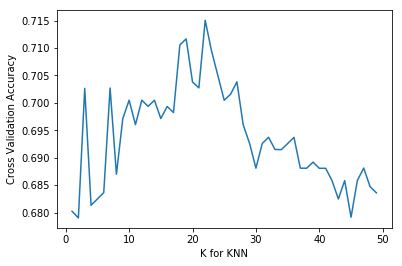

In [25]:
plt.plot(k_range, k_scores)
plt.xlabel('K for KNN')
plt.ylabel('Cross Validation Accuracy')
plt.show()

In [26]:
# 预测测试实验数据

clf=KNeighborsClassifier(n_neighbors=20)
clf.fit(data_now,label)
result=clf.predict(testdat_now)

In [27]:
print(result)

[0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 1 1 1 1 0 0 1 0 0 0]


打印输出

In [28]:
df = pd.DataFrame({"PassengerId": testset['PassengerId'],"Survived": result})

df.to_csv('gender_submission.csv',header=True)
